In [7]:
import os
from scipy.odr import *
DIR = os.path.abspath('')
DATA = os.path.join(DIR, '../Data/Aufg32.csv')
PLOTS = os.path.join(DIR, '../Plots')

sns.set_style('whitegrid')

data = pd.read_csv(DATA, comment='#', engine='python')
data['alpha[rad]'] = -np.radians(data['dAng[Deg]'])
data.head(3)

,I[A],dAng[Deg],alpha[rad]
0,0.930,-1,0.017453
1,2.027,-3,0.052360
2,3.000,-4,0.069813


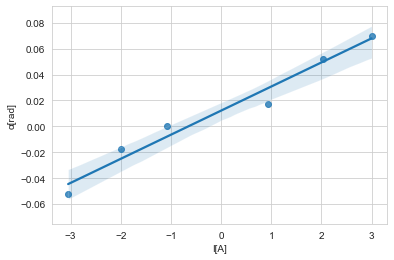

In [15]:
sns.regplot('I[A]', 'alpha[rad]', data)
plt.ylabel('α[rad]')
plt.savefig(os.path.join(PLOTS, "aufg32.png"), dpi=200)

In [14]:
def lin(B, x):
    return B[0]*x

linear = Model(lin)

mu0 = 1.257e-6
N = 800
alpha_err = np.radians(0.5)
I_err = 0.04  # A

V = lambda beta : beta / (mu0 * N)

data_ = RealData(data['I[A]'], data['alpha[rad]'], I_err, alpha_err)

odr = ODR(data_, linear, beta0=[1])
output = odr.run()

print("V = {:.3f} +/- {:.3f}".format(V(*output.beta), V(*output.sd_beta)))

V = 18.421 +/- 2.917


array([0.01852445])